In [1]:
import boto3
bucket_name = 'dataminds-warehouse'
s3_file_key = 'multisim_dataset.parquet'            # e.g. 'folder/myfile.txt'
local_file_path = 'multisim_dataset.parquet'        # Local destination

# Create an S3 client (remove `bucket_name` here — not a valid argument for boto3.client)
s3 = boto3.client(
    's3',
    region_name='us-east-1'
)

# Download the file
try:
    s3.download_file(bucket_name, s3_file_key, local_file_path)
    print(f"✅ File downloaded successfully from s3://{bucket_name}/{s3_file_key} to {local_file_path}")
except Exception as e:
    print("❌ Error downloading file:", e)

✅ File downloaded successfully from s3://dataminds-warehouse/multisim_dataset.parquet to multisim_dataset.parquet


In [2]:
import pandas as pd
df = pd.read_parquet('multisim_dataset.parquet')
df.set_index('telephone_number', inplace=True)

In [3]:
df

,trf,age,gndr,tenure,age_dev,dev_man,device_os_name,dev_num,is_dualsim,is_featurephone,...,val13_6,val14_6,val15_6,val16_6,val17_6,val18_6,val19_6,val20_6,val21_6,target
telephone_number,,,,,,,,,,,,,,,,,,,,,
iWBn_13aJO,J,50,M,6957.0,1263,Samsung,Android OS,1,1,0,...,0.000000,0.0,0.00,0.56,0.00,0.00,60.0,7.0,0.0,1
8JWaD2wYoQ,M,52,M,1041.0,125,Samsung,Android OS,2,1,0,...,206.536585,0.0,0.40,0.00,0.16,0.24,156.0,0.0,2.0,1
sbPnQURi3j,A,49,U,7176.0,345,Samsung,Android OS,1,1,0,...,0.000000,0.0,0.25,2.35,0.00,0.25,241.0,87.0,4.0,1
qOy-JlqPTl,M,49,M,4309.0,466,Samsung,Android OS,1,1,0,...,51.885746,0.0,0.00,0.00,0.00,0.00,299.0,142.0,80.0,1
MNODhcb7h0,A,50,U,6999.0,695,Samsung,Android OS,1,1,0,...,0.000000,0.0,0.00,0.80,0.00,0.00,121.0,96.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vjo-T0Bkap,F,44,M,2047.0,1401,Samsung,Android OS,1,1,0,...,0.000000,0.0,0.18,1.50,0.00,0.09,108.0,18.0,2.0,0
hr9U3_0kXW,G,39,U,4908.0,176,Apple,iOS,2,1,0,...,457.193839,0.0,0.24,2.24,0.00,0.24,98.0,23.0,1.0,0
xw1HISdQiO,H,32,M,5317.0,1088,Samsung,Android OS,1,1,0,...,184.259022,0.0,5.82,7.16,4.44,1.38,256.0,54.0,61.0,0


In [4]:
df.columns[df.dtypes=='object']

Index(['trf', 'age', 'gndr', 'age_dev', 'dev_man', 'device_os_name', 'dev_num',
       'is_dualsim', 'is_featurephone', 'is_smartphone', 'simcard_type',
       'region'],
      dtype='object')

In [5]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['val4_1', 'val6_1', 'val8_1', 'val10_1', 'val19_1', 'val20_1', 'val21_1', 'target'], float64: ['tenure', 'val2_1', 'val3_1', 'val5_1', 'val7_1', 'val9_1', 'val11_1', 'val12_1', 'val13_1', 'val14_1', 'val15_1', 'val16_1', 'val17_1', 'val18_1', 'val2_2', 'val3_2', 'val4_2', 'val5_2', 'val6_2', 'val7_2', 'val8_2', 'val9_2', 'val10_2', 'val11_2', 'val12_2', 'val13_2', 'val14_2', 'val15_2', 'val16_2', 'val17_2', 'val18_2', 'val19_2', 'val20_2', 'val21_2', 'val2_3', 'val3_3', 'val4_3', 'val5_3', 'val6_3', 'val7_3', 'val8_3', 'val9_3', 'val10_3', 'val11_3', 'val12_3', 'val13_3', 'val14_3', 'val15_3', 'val16_3', 'val17_3', 'val18_3', 'val19_3', 'val20_3', 'val21_3', 'val2_4', 'val4_4', 'val5_4', 'val6_4', 'val7_4', 'val8_4', 'val9_4', 'val10_4', 'val11_4', 'val12_4', 'val13_4', 'val14_4', 'val15_4', 'val16_4', 'val17_4', 'val18_4', 'val19_4', 'val20_4', 'val21_4', 'val2_5', 'val4_5', 'val5_5', 'val6_5', 'val7_5', 'val8_5', 'val9_5', 'val10_5', 'val11_5', 'val12_5', 'val13_5', 'val14_5

In [6]:
#I will use pca on them
df.columns[df.dtypes=='float64']

Index(['tenure', 'val2_1', 'val3_1', 'val5_1', 'val7_1', 'val9_1', 'val11_1',
       'val12_1', 'val13_1', 'val14_1',
       ...
       'val12_6', 'val13_6', 'val14_6', 'val15_6', 'val16_6', 'val17_6',
       'val18_6', 'val19_6', 'val20_6', 'val21_6'],
      dtype='object', length=111)

In [7]:
df.isna().sum()


trf          0
age         24
gndr         0
tenure      26
age_dev     20
          ... 
val18_6    272
val19_6    272
val20_6    272
val21_6    272
target       0
Length: 131, dtype: int64

<Axes: xlabel='trf', ylabel='count'>

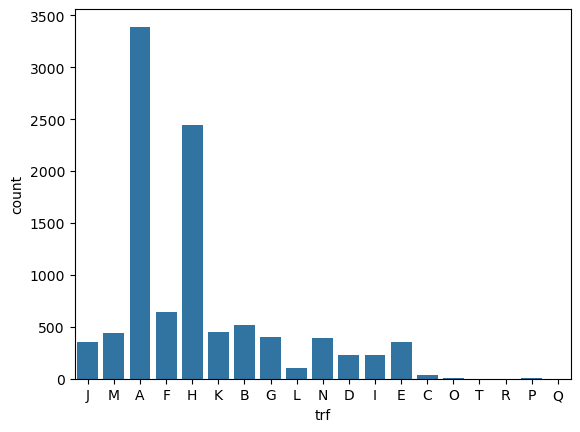

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='trf', data=df)


<Axes: xlabel='gndr', ylabel='count'>

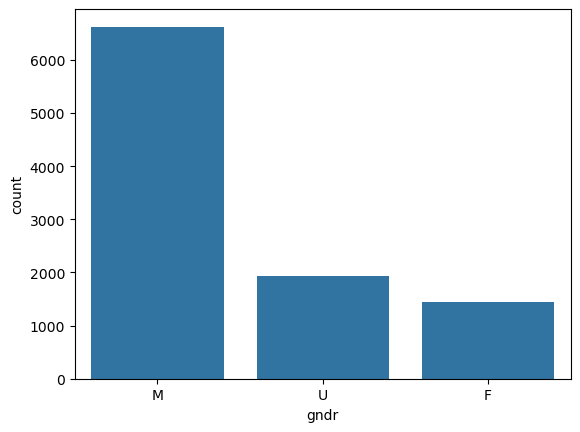

In [ ]:
sns.countplot(x='gndr', data=df)


<Axes: xlabel='is_dualsim', ylabel='count'>

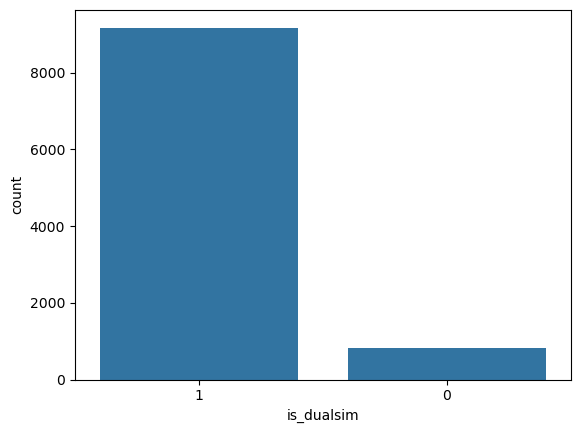

In [ ]:
sns.countplot(x='is_dualsim', data=df)


<Axes: xlabel='target', ylabel='count'>

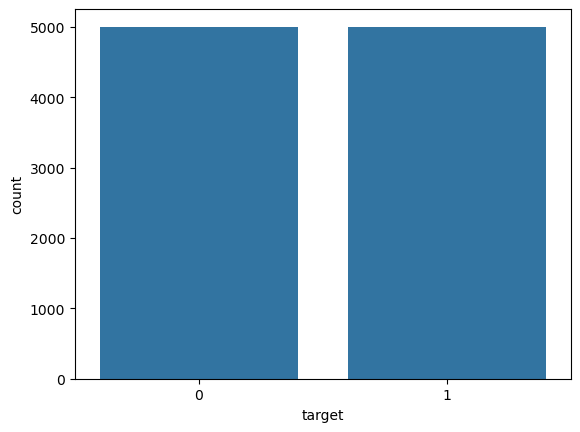

In [12]:
sns.countplot(x='target', data=df)

In [13]:
pd.crosstab(
   df['gndr'], 
   df['target'], 
   normalize='index'
 )


target,0,1
gndr,,
F,0.630780,0.369220
M,0.488678,0.511322
U,0.440581,0.559419


In [14]:
pd.crosstab(
   df['trf'], 
   df['target'], 
   normalize='index'
 )

target,0,1
trf,,
A,0.605015,0.394985
B,0.376200,0.623800
C,0.235294,0.764706
D,0.482456,0.517544
E,0.442857,0.557143
F,0.517997,0.482003
G,0.500000,0.500000
H,0.450980,0.549020
I,0.356828,0.643172


In [15]:
#Some customers uses 2+ phones xD
pd.crosstab(
   df['is_dualsim'], 
   df['target'], 
   normalize='index'
 )

target,0,1
is_dualsim,,
0,0.624544,0.375456
1,0.488831,0.511169


In [16]:
'is_dualsim'

'is_dualsim'

In [17]:
#custom method for returning numbers of outliers
def outlier_counter(x):
    Q1 = df[f'{x}'].quantile(0.25)
    Q3 = df[f'{x}'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[f'{x}'] < Q1 - 1.5*IQR) | (df[f'{x}'] > Q3 + 1.5*IQR)]
    return outliers.count()

In [18]:
outlier_counter("target")

trf        0
age        0
gndr       0
tenure     0
age_dev    0
          ..
val18_6    0
val19_6    0
val20_6    0
val21_6    0
target     0
Length: 131, dtype: int64

In [19]:
outlier_counter("tenure")

trf        0
age        0
gndr       0
tenure     0
age_dev    0
          ..
val18_6    0
val19_6    0
val20_6    0
val21_6    0
target     0
Length: 131, dtype: int64

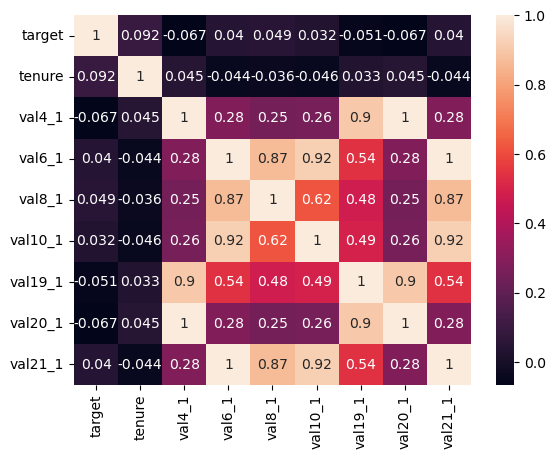

In [20]:

#corelation between target and futures are bad, but between future and future is high ,which is also bad.I will drop some of them. I am thinking using pca.
sns.heatmap(df[['target','tenure', 'val4_1', 'val6_1', 'val8_1', 'val10_1', 'val19_1', 'val20_1', 'val21_1' ]].corr(), annot=True)
plt.show()

In [21]:
from sklearn.utils import shuffle
X = df.drop('target', axis=1)
y = df['target']
X, y = shuffle(X, y, random_state=42)

In [22]:
!pip install category_encoders

In [23]:
!pip install xgboost

In [24]:
!pip install optuna

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from category_encoders import CatBoostEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer
import optuna
from sklearn.model_selection import cross_val_score

import warnings
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=UserWarning)
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

numeric_features=X.columns[X.dtypes=='float64'].append(X.columns[X.dtypes=='int64'])

numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", RobustScaler()),
        ("yeo-johnson_transformer", PowerTransformer(method='yeo-johnson')),
        ("pca", PCA(n_components=2, random_state=42)),
    ]
)
categorical_features=X.columns[X.dtypes=='object']

categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy='most_frequent')),
        ("encoder", CatBoostEncoder()),
        ("selector", SelectPercentile(chi2, percentile=50)),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

    
clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(penalty="l1",C=0.5,solver="liblinear",max_iter=1000,random_state=42))
    ]
)

clf2 = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier(random_state=42))
    ]
)
clf3 = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", KNeighborsClassifier(n_neighbors=5))
    ]
)
clf4 = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", SVC(kernel='rbf', probability=True, random_state=42))
    ]
)
clf5 = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", DecisionTreeClassifier(random_state=42))
    ]
)
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.2),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1e-2),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-5, 1e-2),
        'use_label_encoder': False,
        'eval_metric': 'logloss',
        'random_state': 42
    }
    clf6 = Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("classifier", XGBClassifier(**param))
        ]
    )
    scores = cross_val_score(clf6, X, y, cv=3, scoring='accuracy')
    return -scores.mean()

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)
print("Best Parameters:", study.best_params)

# After tuning, train final model with best params
best_params = study.best_params
best_params.update({'use_label_encoder': False, 'eval_metric': 'logloss', 'random_state': 42})

final_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(**best_params))
])

final_pipeline.fit(X_train, y_train)
print("Final model test accuracy:", final_pipeline.score(X_test, y_test))

y_pred = final_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

[I 2025-08-09 13:10:49,793] A new study created in memory with name: no-name-954d03dc-3103-4bbd-8334-121e72a08621
[I 2025-08-09 13:10:57,483] Trial 0 finished with value: -0.5462995309728934 and parameters: {'max_depth': 7, 'learning_rate': 0.1488341514962274, 'n_estimators': 896, 'subsample': 0.9207736033028373, 'colsample_bytree': 0.7770046838938403, 'reg_alpha': 0.0020144288372870417, 'reg_lambda': 0.0026749548226931955}. Best is trial 0 with value: -0.5462995309728934.
[I 2025-08-09 13:11:02,587] Trial 1 finished with value: -0.5669002413138734 and parameters: {'max_depth': 3, 'learning_rate': 0.12148815354803949, 'n_estimators': 712, 'subsample': 0.9323615934987365, 'colsample_bytree': 0.5240675695140347, 'reg_alpha': 0.003445962055312372, 'reg_lambda': 0.00013882662345655872}. Best is trial 1 with value: -0.5669002413138734.
[I 2025-08-09 13:11:07,297] Trial 2 finished with value: -0.5924016816798656 and parameters: {'max_depth': 3, 'learning_rate': 0.049199234600958916, 'n_estim

Best Parameters: {'max_depth': 4, 'learning_rate': 0.01080801570823662, 'n_estimators': 121, 'subsample': 0.5114713410385536, 'colsample_bytree': 0.641592115257034, 'reg_alpha': 0.0005360046089525323, 'reg_lambda': 6.490970471805012e-05}
Final model test accuracy: 0.6055
              precision    recall  f1-score   support

           0       0.62      0.56      0.59      1002
           1       0.60      0.65      0.62       998

    accuracy                           0.61      2000
   macro avg       0.61      0.61      0.60      2000
weighted avg       0.61      0.61      0.60      2000

model score: 0.613
              precision    recall  f1-score   support

           0       0.62      0.59      0.61      1002
           1       0.61      0.63      0.62       998

    accuracy                           0.61      2000
   macro avg       0.61      0.61      0.61      2000
weighted avg       0.61      0.61      0.61      2000



In [31]:
clf2.fit(X_train, y_train)
print("model score: %.3f" % clf2.score(X_test, y_test))
y_pred = clf2.predict(X_test)
print(classification_report(y_test, y_pred))

model score: 0.603
              precision    recall  f1-score   support

           0       0.61      0.58      0.59      1002
           1       0.60      0.63      0.61       998

    accuracy                           0.60      2000
   macro avg       0.60      0.60      0.60      2000
weighted avg       0.60      0.60      0.60      2000



In [32]:
clf3.fit(X_train, y_train)
print("model score: %.3f" % clf3.score(X_test, y_test))
y_pred = clf3.predict(X_test)
print(classification_report(y_test, y_pred))

model score: 0.522
              precision    recall  f1-score   support

           0       0.52      0.51      0.52      1002
           1       0.52      0.54      0.53       998

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.52      2000
weighted avg       0.52      0.52      0.52      2000



In [33]:
clf4.fit(X_train, y_train)
print("model score: %.3f" % clf4.score(X_test, y_test))
y_pred = clf4.predict(X_test)
print(classification_report(y_test, y_pred))

model score: 0.567
              precision    recall  f1-score   support

           0       0.58      0.52      0.55      1002
           1       0.56      0.62      0.59       998

    accuracy                           0.57      2000
   macro avg       0.57      0.57      0.57      2000
weighted avg       0.57      0.57      0.57      2000



In [34]:
clf5.fit(X_train, y_train)
print("model score: %.3f" % clf5.score(X_test, y_test))
y_pred = clf5.predict(X_test)
print(classification_report(y_test, y_pred))

model score: 0.552
              precision    recall  f1-score   support

           0       0.55      0.56      0.55      1002
           1       0.55      0.55      0.55       998

    accuracy                           0.55      2000
   macro avg       0.55      0.55      0.55      2000
weighted avg       0.55      0.55      0.55      2000



In [37]:
final_pipeline.fit(X_train, y_train)
print("model score: %.3f" % final_pipeline.score(X_test, y_test))
y_pred = final_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

model score: 0.606
              precision    recall  f1-score   support

           0       0.62      0.56      0.59      1002
           1       0.60      0.65      0.62       998

    accuracy                           0.61      2000
   macro avg       0.61      0.61      0.60      2000
weighted avg       0.61      0.61      0.60      2000



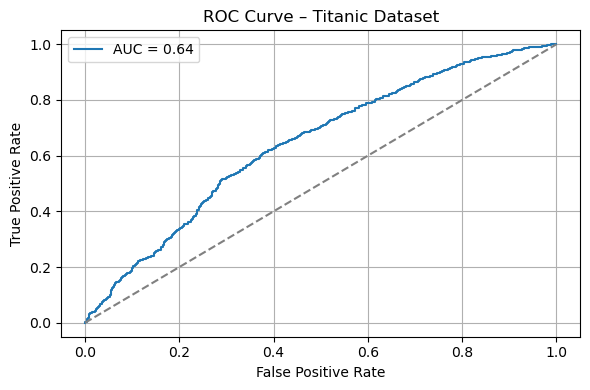

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score
y_scores = clf.predict_proba(X_test)[:, 1]
# ROC and AUC
fpr, tpr, _ = roc_curve(y_test, y_scores)
auc_score = roc_auc_score(y_test, y_scores)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Titanic Dataset")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

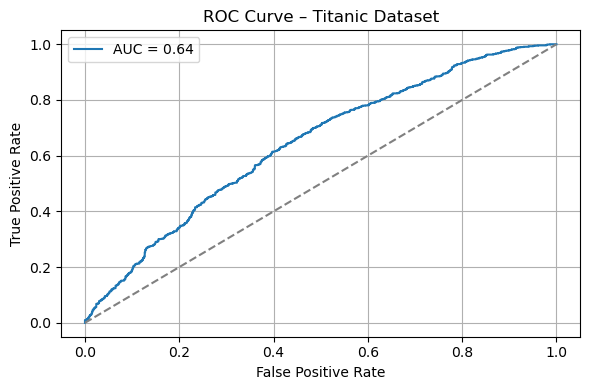

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
y_scores = final_pipeline.predict_proba(X_test)[:, 1]
# ROC and AUC
fpr, tpr, _ = roc_curve(y_test, y_scores)
auc_score = roc_auc_score(y_test, y_scores)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Titanic Dataset")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import ttest_rel

# Stratified K-Folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
# Evaluate both models
scores1 = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
scores2 = cross_val_score(clf2, X, y, cv=cv, scoring='accuracy')
scores3 = cross_val_score(clf3, X, y, cv=cv, scoring='accuracy')
scores4 = cross_val_score(clf4, X, y, cv=cv, scoring='accuracy')
scores5 = cross_val_score(clf5, X, y, cv=cv, scoring='accuracy')
scores6 = cross_val_score(final_pipeline, X, y, cv=cv, scoring='accuracy')
print("Logistic Regression Accuracies:", scores1)
print("Random Forest Accuracies:", scores2)
print("KNN Accuracies:", scores3)
print("SVM Accuracies:", scores4)
print("Decision Tree Accuracies:", scores5)
print("XGBoost Accuracies:", scores6)

Logistic Regression Accuracies: [0.59  0.612 0.63  0.603 0.614 0.614 0.614 0.609 0.589 0.58 ]
Random Forest Accuracies: [0.599 0.632 0.623 0.586 0.596 0.605 0.629 0.589 0.589 0.572]
KNN Accuracies: [0.522 0.514 0.546 0.535 0.526 0.537 0.509 0.519 0.518 0.569]
SVM Accuracies: [0.571 0.556 0.571 0.575 0.557 0.593 0.567 0.574 0.564 0.589]
Decision Tree Accuracies: [0.536 0.577 0.546 0.531 0.543 0.524 0.516 0.533 0.544 0.565]
XGBoost Accuracies: [0.595 0.625 0.638 0.613 0.63  0.625 0.607 0.622 0.597 0.578]


In [42]:
# Paired t-test
t_stat, p_value = ttest_rel(scores2, scores1)
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
#Logistic Regression is better, t-statistic<0

t-statistic: -0.7847
p-value: 0.4528


In [43]:
t_stat, p_value = ttest_rel(scores3, scores1)
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
#Logistic Regression is better, t-statistic<0

t-statistic: -9.2254
p-value: 0.0000


In [44]:
t_stat, p_value = ttest_rel(scores4, scores1)
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
#Logistic Regression is better, t-statistic<0

t-statistic: -4.9670
p-value: 0.0008


In [45]:
t_stat, p_value = ttest_rel(scores5, scores1)
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
#Logistic Regression is better, t-statistic<0

t-statistic: -7.7159
p-value: 0.0000


In [46]:
t_stat, p_value = ttest_rel(scores6, scores1)
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
#XGBoost is better, t-statistic>0

t-statistic: 3.3229
p-value: 0.0089


In [51]:
print(scores1.mean())
print(scores6.mean())

0.6054999999999999
0.613


In [52]:
#XGBoost is the best according to t-test, however, difference is not so big ,we can use base estimator as well.

In [53]:
import boto3

# Replace with your actual credentials and info
bucket_name = 'dataminds-homeworks'
s3_file_key = 'vasif-orujzada-trainmodel.ipynb' 
local_file_path = 'vasif-orujzada-trainmodel.ipynb'

# Create an S3 client
s3 = boto3.client(
    's3'
)

# Upload the file
try:
    s3.upload_file(local_file_path, bucket_name, s3_file_key)
    print(f"File uploaded successfully to s3://{bucket_name}/{s3_file_key}")
except Exception as e:
    print("Error uploading file:", e)

File uploaded successfully to s3://dataminds-homeworks/vasif-orujzada-trainmodel.ipynb
